### Predictive Modeling

Modeling Outline:
1. Import Packages/Data/Functions
2. Split Data
3. Data Modeling
4. Cross Validation
5. Run Best Performing Model with Test Data Split

In [4]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
#Import data split function from data_preprocessing.py
from data_preprocessing import train_val_test

In [6]:
#Import packges for modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [7]:
import os
cwd = os.getcwd()

In [8]:
model_data = pd.read_csv(cwd + '/data/model_data.csv', index_col=0)

In [9]:
model_data.head()

,Season,Gender,Age,Height,Entered,Finalist,Loyalty
Name,,,,,,,
Malia Arkian,2,False,26,66,7,False,0.300598
Ben Porter,1,True,24,71,32,False,0.300598
Poppy Farnan,1,False,22,66,32,False,0.300598
Oliver Maxwell Fernandez,2,True,25,74,30,False,0.300598
Shannon Singh,7,False,22,68,1,False,0.300598


In [10]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, Malia Arkian to Wes Nelson
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    295 non-null    int64  
 1   Gender    295 non-null    bool   
 2   Age       295 non-null    int64  
 3   Height    295 non-null    int64  
 4   Entered   295 non-null    int64  
 5   Finalist  295 non-null    bool   
 6   Loyalty   295 non-null    float64
dtypes: bool(2), float64(1), int64(4)
memory usage: 14.4+ KB


Text(0.5, 1.0, 'Feature Correlation with Finalist')

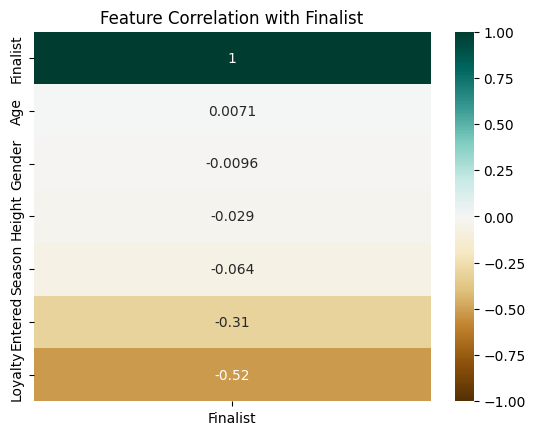

In [11]:
heatmap = sns.heatmap(model_data.corr()
                      [['Finalist']].sort_values(by='Finalist', ascending=False), vmin=-1,
                       vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Feature Correlation with Finalist')

### Split Data

In [12]:
x_train, y_train, x_validate, y_validate, x_test, y_test = train_val_test(model_data, 'Finalist') 

Train Split:  (224, 6) | Validate Split:  (36, 6) | Test Split:  (35, 6)


In [13]:
x_train.head()

,Season,Gender,Age,Height,Entered,Loyalty
Name,,,,,,
Malia Arkian,2,False,26,66,7,0.300598
Ben Porter,1,True,24,71,32,0.300598
Poppy Farnan,1,False,22,66,32,0.300598
Oliver Maxwell Fernandez,2,True,25,74,30,0.300598
Shannon Singh,7,False,22,68,1,0.300598


In [14]:
y_train.head()

Name
Malia Arkian                False
Ben Porter                  False
Poppy Farnan                False
Oliver Maxwell Fernandez    False
Shannon Singh               False
Name: Finalist, dtype: bool

## Modeling

Produce a predictive model that outperforms a baseline in predicting the target variable - "Finalist".

Models I will use include the following from the Scikit-Learn library:

- Logistic Regression 
- KNN or k-Nearest Neighbors
- Decision Tree 
- Random Forrest 
- Perceptron Artificial Neural Network

## Establish Baseline
I will use the acccuracy score from DummyClassifier as a baseline to compare other models against.

In [15]:
dummy = DummyClassifier(strategy='stratified', random_state=42)
dummy.fit(x_train, y_train)
y_pred = dummy.predict(x_validate)
dc_accuracy = accuracy_score(y_pred, y_validate)

print(dc_accuracy)

0.7222222222222222


Baseline accurancy score is .722 <br>
If a model surpasses this on test data, we can assume that the model does have predictive power.

## Testing Different Models

### LOGISTIC REGRESSION

In [16]:
#Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=500)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_validate)
log_accuracy = accuracy_score(y_pred, y_validate)

print(log_accuracy)

0.7777777777777778


### RANDOM FOREST

In [17]:
#Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_validate)
random_forest_accuracy = accuracy_score(y_pred, y_validate)

print(random_forest_accuracy)

0.8611111111111112


### DECISION TREE

In [18]:
#Decision Tree
decision_tree = tree.DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train,y_train)
y_pred = decision_tree.predict(x_validate)
decision_tree_accuracy = accuracy_score(y_pred, y_validate)

print(decision_tree_accuracy)

0.7777777777777778


### PERCEPTRON

In [19]:
#Perceptron
perceptron = Perceptron(random_state=42)
perceptron.fit(x_train, y_train)

y_pred = perceptron.predict(x_validate)

perceptron_accuracy = accuracy_score(y_pred, y_validate)

print(perceptron_accuracy)

0.2222222222222222


### KNBEIGBOR

In [20]:
#KNN
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_validate)
knn_accuracy = accuracy_score(y_pred, y_validate)

print(knn_accuracy)

0.6388888888888888


In [21]:
# Rank models accuracy score
ranking = pd.DataFrame({
    'Model Type': ['Dummy Classifier', 'Logistic Regression', 'Random Forest', 'Decision Tree', 'Perceptron', 'KNeightbors'],
    'Accuracy_Score': [dc_accuracy, log_accuracy, random_forest_accuracy, decision_tree_accuracy, perceptron_accuracy, knn_accuracy]
})

ranking_df = ranking.sort_values(by='Accuracy_Score', ascending=False)
ranking_df = ranking_df.set_index('Accuracy_Score')
ranking_df.head(6)

,Model Type
Accuracy_Score,
0.861111,Random Forest
0.777778,Logistic Regression
0.777778,Decision Tree
0.722222,Dummy Classifier
0.638889,KNeightbors
0.222222,Perceptron


Random Forest performs the best on train/validation data split
- I will now perform cross validation using random forest to view performance on multiple folds of data.

In [22]:
# Random Forest Cross Validation
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.73913043 0.73913043 0.82608696 0.82608696 0.86363636 0.77272727
 0.63636364 0.72727273 0.81818182 0.5       ]
Mean: 0.7448616600790514
Standard Deviation: 0.10274190181853268


Above it shows average model accuracy using 10 folds and the standard deviation which shows the variance in accuracy scores between the folds. <br>
These results are not as strong as the random state initially used, but will hopefully this model will provide predictive power when used on the test data. 

In [23]:
# ranking importance of features for model when using random forest
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Loyalty,0.461
Entered,0.158
Height,0.153
Age,0.114
Season,0.092
Gender,0.023


Above I am ranking features by how impactful they are within the random forest model. <br>
Gender is not impactful by itself, but will help the model to contextualize height and age for contestants. <br>
Loyalty is heavily weighted, in future iterations of the model, I may rethink how I dealt with loyalty score paramater tuning. <br>

## Test Data

Now I will check how random forest performs on the test data.

In [24]:
#Random Forest
random_forest_test = RandomForestClassifier(random_state=42)
random_forest_test.fit(x_train, y_train)
y_pred = random_forest_test.predict(x_test)
random_forest_test_accuracy = accuracy_score(y_pred, y_test)

print(random_forest_test_accuracy)

0.7714285714285715


Accuracy score of .771 on using Random Forest on the test data is in line with the average accuracy score .745 in the cross validation - meaning the model performs similarly in both instances.<br>
This score also outperforms the benchmark test using DummyClassifier, meaning that using the Random Forest Classifier we can predict which candidates are most likely to be finalists on Love Island.